In [1]:
from collections import Counter
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from operator import itemgetter
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from textatistic import Textatistic
from textblob import TextBlob
from textblob import Word
from textblob.sentiments import NaiveBayesAnalyzer
from wordcloud import WordCloud
import imageio
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import spacy
import seaborn as sns
import statsmodels.api as sm

In [2]:
#1.
blob = TextBlob(Path('amazon.txt').read_text(encoding='utf-8'))

In [3]:
blob.sentiment

Sentiment(polarity=0.15524626881055453, subjectivity=0.4461379422165134)

In [4]:
#It's neutral tone. It's objective

In [5]:
text = Path('amazon.txt').read_text()
readability = Textatistic(text)
readability.dict()

{'char_count': 19804,
 'word_count': 4051,
 'sent_count': 237,
 'sybl_count': 5767,
 'notdalechall_count': 1063,
 'polysyblword_count': 414,
 'flesch_score': 69.04929577215398,
 'fleschkincaid_score': 7.874672045345893,
 'gunningfog_score': 10.92501033760482,
 'smog_score': 10.679516922011825,
 'dalechall_score': 8.627668820742286}

In [6]:
#The Dale-Chall score is the one used most for a broad range of texts and this tells us both books are at a 8th grade reading level

In [18]:
#3.
stop_words = stopwords.words('english')
add_words = ['’','‘','”','“']
for i in range(len(add_words)):
    stop_words.append(add_words[i])

items = blob.word_counts.items()
items = [item for item in items if item[0] not in stop_words]
sorted_items = sorted(items, key=itemgetter(1), reverse=True)
top15 = sorted_items[0:16]
top15

[('employees', 31),
 ('amazon', 25),
 ('work', 25),
 ('value', 20),
 ('–', 19),
 ('billion', 18),
 ('create', 14),
 ('would', 14),
 ('2020', 13),
 ('customers', 12),
 ('also', 12),
 ('earth', 11),
 ('climate', 11),
 ('us', 10),
 ('one', 9),
 ('million', 9)]

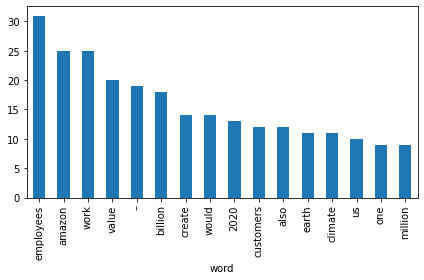

In [9]:
#4
df = pd.DataFrame(top15, columns=['word', 'count'])
axes = df.plot.bar(x='word', y='count', legend=False)
plt.gcf().tight_layout()

In [19]:
#yes. It's common theme i notice in the question 3

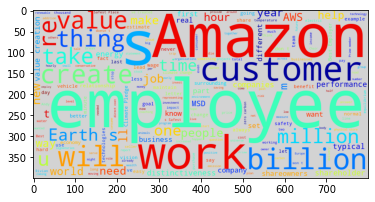

In [16]:
#5
text = Path('amazon.txt').read_text()
mask_image = imageio.imread('flag.png')
wordcloud = WordCloud(colormap='jet',background_color='lightgray',width= 800,height= 400)
wordcloud = wordcloud.generate(text)
wordcloud = wordcloud.to_file('amazonresult.png')
plt.imshow(wordcloud)